# Titanic Dataset

In [95]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
titanic=pd.read_csv('C:\\Users\\Rohan raj\\Desktop\\First steps into case studies\\Dataset_2_Titanic.txt', sep=','
                    , quotechar='"', encoding='ISO 8859-15')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Droping all duplicate entry and creating one column to verfiy.

In [3]:
titanic.drop_duplicates()
titanic["is_duplicate"]= titanic.duplicated()
 
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,is_duplicate
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False


In [4]:
missing_df = titanic.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (titanic.shape[0] 
                                - missing_df['missing_count']) / titanic.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

,column_name,missing_count,filling_factor
0,Cabin,731,23.052632
1,Age,185,80.526316
2,Embarked,4,99.578947
3,Survived,3,99.684211
4,Fare,2,99.789474
5,Sex,1,99.894737
6,PassengerId,0,100.000000
7,Pclass,0,100.000000
8,Name,0,100.000000
9,SibSp,0,100.000000


In [5]:
import plotly.plotly as ply
age_by_class = [{'y': data.values, 
                 'name': Pclass,
                 'type': 'box',
                 'boxpoints': 'all', 
                 'jitter': 0.3} for Pclass,data in list(titanic.groupby('Pclass')['Age'])]
layout = {'xaxis': {'showgrid':False,'zeroline':False, 
                    'title': 'Pclass'},
          'yaxis': {'zeroline':False,'gridcolor':'white', 'title': 'Age'},
          'plot_bgcolor': 'rgb(233,233,233)',
          'showlegend':False}


### Droping the entry of Daher,Mr. Shedid and Samaan, Mr. Elias

In [8]:
titanic = titanic.drop([918,920])

In [218]:
ply.iplot(age_by_class, layout=layout)

In [8]:
#import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


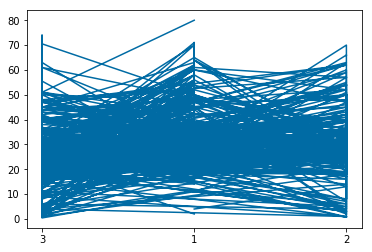

In [9]:
#import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
plt.plot(titanic['Pclass'], titanic['Age'])

### 0- Didn't survive 1- Survived

In [17]:
titanic.Survived.value_counts()

0.0    584
1.0    361
Name: Survived, dtype: int64

In [ ]:
#titanic = titanic.dropna(subset=['Pclass','Age'])

In [21]:
cd Data Analysis

C:\Users\Rohan raj\Data Analysis


In [22]:
ls

 Volume in drive C is windows
 Volume Serial Number is 457B-83C4

 Directory of C:\Users\Rohan raj\Data Analysis

05-11-2018  19:29    <DIR>          .
05-11-2018  19:29    <DIR>          ..
26-10-2018  12:40    <DIR>          .spyproject
04-11-2018  19:56           488,817 04Novfile.csv
04-11-2018  21:49           588,582 04NovfileV2.csv
04-11-2018  23:04           516,024 04NovfileV3.csv
04-11-2018  23:30           472,449 04NovfileV4.csv
05-11-2018  18:58           471,811 05NovfileV1.csv
31-10-2018  16:56           538,601 31Octfile.csv
30-10-2018  15:42           741,165 Dataset_1_Funerals-OpenRefine.txt
05-11-2018  20:51               422 Death_frequency.txt
26-10-2018  12:43             7,186 Week1.py
26-10-2018  12:45             7,845 week2.py
              10 File(s)      3,832,902 bytes
               3 Dir(s)  18,559,275,008 bytes free


In [24]:
titanic.to_csv('TitanicV2.csv')

In [25]:
ls

 Volume in drive C is windows
 Volume Serial Number is 457B-83C4

 Directory of C:\Users\Rohan raj\Data Analysis

12-11-2018  23:22    <DIR>          .
12-11-2018  23:22    <DIR>          ..
26-10-2018  12:40    <DIR>          .spyproject
04-11-2018  19:56           488,817 04Novfile.csv
04-11-2018  21:49           588,582 04NovfileV2.csv
04-11-2018  23:04           516,024 04NovfileV3.csv
04-11-2018  23:30           472,449 04NovfileV4.csv
05-11-2018  18:58           471,811 05NovfileV1.csv
31-10-2018  16:56           538,601 31Octfile.csv
30-10-2018  15:42           741,165 Dataset_1_Funerals-OpenRefine.txt
05-11-2018  20:51               422 Death_frequency.txt
12-11-2018  23:22            78,373 TitanicV2.csv
26-10-2018  12:43             7,186 Week1.py
26-10-2018  12:45             7,845 week2.py
              11 File(s)      3,911,275 bytes
               3 Dir(s)  18,559,045,632 bytes free


###Exploratory data analysis

Learn about data
1. Are there missing data?
2. Is it categorical?
3. if not, min , max, avg values?
4. if yes, what are the categories?
5. distribution of variables
6. Duplicate entry

In [27]:
titanic.Sex.value_counts()

male      612
female    336
Name: Sex, dtype: int64

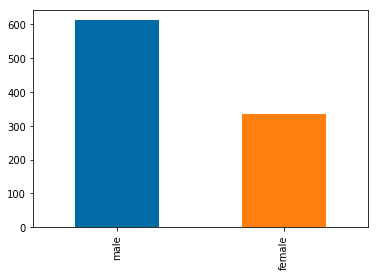

In [32]:
titanic.Sex.value_counts().plot(kind ='bar')

In [34]:
titanic[titanic.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,is_duplicate


In [35]:
titanic.describe()

,PassengerId,Survived,Age,SibSp,ParCh,Fare
count,948.000000,945.000000,763.000000,948.000000,948.000000,948.000000
mean,474.562236,0.382011,29.886199,0.524262,0.378692,32.220415
std,273.913022,0.486136,14.464587,1.087726,0.799320,49.605518
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,237.750000,0.000000,21.000000,0.000000,0.000000,7.925000
50%,474.500000,0.000000,28.000000,0.000000,0.000000,14.458300
75%,711.250000,1.000000,39.000000,1.000000,0.000000,31.000000
max,950.000000,1.000000,80.000000,8.000000,6.000000,512.329200


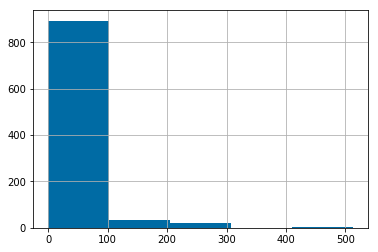

In [38]:
titanic.Fare.hist(bins=5)

In [235]:
titanic[titanic.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.00,0,0,LINE,0.0,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,26.00,0,0,239853,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,38.50,0,0,239853,0.0,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,47.00,0,0,239853,0.0,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.50,0,0,239854,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,20.50,0,0,112052,0.0,NaN,S


In [112]:
titanic['Pclass']=titanic['Pclass'].astype(str).astype(int)

In [113]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 12 columns):
PassengerId    948 non-null int64
Survived       945 non-null float64
Pclass         948 non-null int32
Name           948 non-null object
Sex            948 non-null object
Age            948 non-null float64
SibSp          948 non-null int64
ParCh          948 non-null int64
Ticket         948 non-null object
Fare           948 non-null float64
Cabin          217 non-null object
Embarked       946 non-null object
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 92.6+ KB


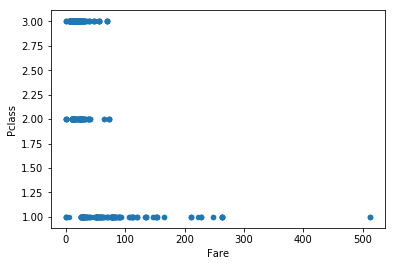

In [115]:
titanic.plot.scatter(x="Fare", y="Pclass")

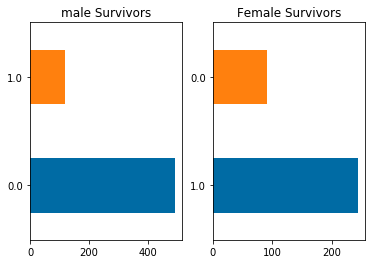

In [51]:
# Womens and mens surviving ratio

fig, axs =plt.subplots(1,2)
titanic[titanic.Sex =='male'].Survived.value_counts().plot(kind='barh',ax=axs[0], title ='male Survivors')
titanic[titanic.Sex =='female'].Survived.value_counts().plot(kind='barh',ax=axs[1], title ='Female Survivors')

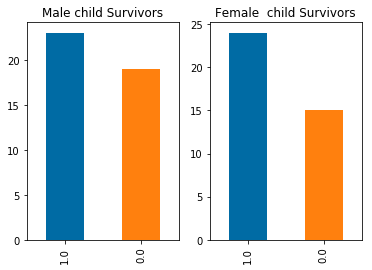

In [55]:
# Male and female survival by their age
fig, axs =plt.subplots(1,2)
titanic[(titanic.Sex =='male') & (titanic.Age < 15)].Survived.value_counts().plot(kind='bar',ax=axs[0], 
                                                                                  title ='Male child Survivors')
titanic[(titanic.Sex =='female') & (titanic.Age < 15)].Survived.value_counts().plot(kind='bar',ax=axs[1], 
                                                                                    title ='Female  child Survivors')

In [59]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,is_duplicate
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,False
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,False
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,False
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,False
29,30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,False
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,False
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,False
36,37,1.0,3,"Mamée, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,False
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,False


In [9]:
titanic.Age.isnull().sum()

185

### Handling Missing data

Strategies
<li> Drop any observation with missing age
<li> Set NaN as 0 - in the case  continous / categorical variables, craete some new category for Nan?
<li> use average value..
<li> create Ml algo to predict missing values(ex-linear regression)

In [60]:
avgAge = titanic.Age.mean()
print(avgAge)

29.886199213630405


In [12]:
titanic_age= titanic
titanic_age['Age']= titanic['Age'].interpolate()
titanic_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,44.50,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [15]:
titanic_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 12 columns):
PassengerId    948 non-null int64
Survived       945 non-null float64
Pclass         948 non-null object
Name           948 non-null object
Sex            948 non-null object
Age            948 non-null float64
SibSp          948 non-null int64
ParCh          948 non-null int64
Ticket         948 non-null object
Fare           948 non-null float64
Cabin          217 non-null object
Embarked       946 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 96.3+ KB


### Droping some of the columns which many not contribute much to our machine learning model such as Name, Ticket, Cabin etc

In [17]:
cols = ['Name','Ticket','Cabin']
titanic_age = titanic_age.drop(cols,axis=1)
titanic_age.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [20]:
titanic_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 9 columns):
PassengerId    948 non-null int64
Survived       945 non-null float64
Pclass         948 non-null object
Sex            948 non-null object
Age            948 non-null float64
SibSp          948 non-null int64
ParCh          948 non-null int64
Fare           948 non-null float64
Embarked       946 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 74.1+ KB


### Now we convert the Pclass, Sex, Embarked to columns in pandas and drop them after conversion.

In [22]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
 dummies.append(pd.get_dummies(titanic_age[col]))

In [24]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummies.head()

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


### Then  we concatenate to the original dataframe columnwise

In [25]:
titanic_age = pd.concat((titanic_age,titanic_dummies),axis=1)

In [30]:
titanic_age.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked,1,2,3,female,male,C,Q,S
0,1,0.0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


### Now that we converted Pclass, Sex, Embarked values into columns, we drop the redundant same columns from the dataframe

In [31]:
titanic_age = titanic_age.drop(['Pclass','Sex','Embarked'],axis=1)
titanic_age.head()

,PassengerId,Survived,Age,SibSp,ParCh,Fare,1,2,3,female,male,C,Q,S
0,1,0.0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1.0,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1.0,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1.0,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0.0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [32]:
titanic_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 14 columns):
PassengerId    948 non-null int64
Survived       945 non-null float64
Age            948 non-null float64
SibSp          948 non-null int64
ParCh          948 non-null int64
Fare           948 non-null float64
1              948 non-null uint8
2              948 non-null uint8
3              948 non-null uint8
female         948 non-null uint8
male           948 non-null uint8
C              948 non-null uint8
Q              948 non-null uint8
S              948 non-null uint8
dtypes: float64(3), int64(3), uint8(8)
memory usage: 59.2 KB


### All is good, except Survived which has few missing values. Pandas has a nice interpolate() function that will replace all the missing NaNs to interpolated values.

In [33]:
titanic_age['Survived'] = titanic_age['Survived'].interpolate()

In [34]:
titanic_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 14 columns):
PassengerId    948 non-null int64
Survived       948 non-null float64
Age            948 non-null float64
SibSp          948 non-null int64
ParCh          948 non-null int64
Fare           948 non-null float64
1              948 non-null uint8
2              948 non-null uint8
3              948 non-null uint8
female         948 non-null uint8
male           948 non-null uint8
C              948 non-null uint8
Q              948 non-null uint8
S              948 non-null uint8
dtypes: float64(3), int64(3), uint8(8)
memory usage: 59.2 KB


### Now we convert our dataframe from pandas to numpy and we assign input and output

In [35]:
X = titanic_age.values
y = titanic_age['Survived'].values

In [195]:
titanic_age

,PassengerId,Survived,Age,SibSp,ParCh,Fare,1,2,3,female,male,C,Q,S
0,1,0.0,22.00,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1.0,38.00,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1.0,26.00,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1.0,35.00,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0.0,35.00,0,0,8.0500,0,0,1,0,1,0,0,1
5,6,0.0,44.50,0,0,8.4583,0,0,1,0,1,0,1,0
6,7,0.0,54.00,0,0,51.8625,1,0,0,0,1,0,0,1
7,8,0.0,2.00,3,1,21.0750,0,0,1,0,1,0,0,1
8,9,1.0,27.00,0,2,11.1333,0,0,1,1,0,0,0,1
9,10,1.0,14.00,1,0,30.0708,0,1,0,1,0,1,0,0


### X has still Survived values in it, which should not be there. So we drop in numpy column which is the 1st column

In [188]:
titanic_ml= titanic_age.drop(['Survived'],1)
titanic_ml.head()

,PassengerId,Age,SibSp,ParCh,Fare,1,2,3,female,male,C,Q,S
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [37]:
import numpy as np
X = np.delete(X,1,axis=1)

### Now that we are ready with X and y, lets split the dataset for 70% Training and  30% test set using train_test split

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Lets start with simple Decision Tree Classifier machine learning algorithm and see how it goes

In [215]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8016877637130801

### Decision trees compute entropy in the information system. If you peform a decision tree on dataset, the variable importances_ contains important information on what columns of data has large variances thus contributing to the decision. Lets see the output

### This output shows that second element in array 0.117,  “Age” has 11% importance, 'fare' has 7%, the last 4th shows 49% which is ‘Females’.

In [216]:
clf.feature_importances_

array([0.08546391, 0.11722885, 0.05667004, 0.01417816, 0.07342659,
       0.04762718, 0.00511989, 0.09411162, 0.49132531, 0.        ,
       0.        , 0.        , 0.01484845])

In [217]:
imp=clf.feature_importances_
names=titanic_ml.columns
imp,names=zip(*(zip(imp,names)))
print(imp,names)

(0.08546391372541838, 0.11722884749822779, 0.05667004483366061, 0.014178155469277975, 0.07342659418552848, 0.04762717686744485, 0.005119889475017047, 0.0941116168442454, 0.4913253103381428, 0.0, 0.0, 0.0, 0.01484845076303669) ('PassengerId', 'Age', 'SibSp', 'ParCh', 'Fare', '1', '2', '3', 'female', 'male', 'C', 'Q', 'S')


In [100]:
clf.tree_

TypeError: <sklearn.tree._tree.Tree object at 0x000002706739E098> is not an estimator instance.

In [103]:
ls

 Volume in drive C is windows
 Volume Serial Number is 457B-83C4

 Directory of C:\Users\Rohan raj

18-11-2018  15:23    <DIR>          .
18-11-2018  15:23    <DIR>          ..
25-10-2018  13:13    <DIR>          .3T
26-10-2018  15:43    <DIR>          .anaconda
04-07-2017  06:36    <DIR>          .android
21-10-2016  08:57    <DIR>          .astropy
25-10-2018  13:13    <DIR>          .cache
26-10-2018  15:59    <DIR>          .conda
07-08-2016  22:17    <DIR>          .config
07-08-2016  06:37             1,002 .csslintrc
05-11-2018  21:55             1,976 .dbshell
26-10-2018  12:40               126 .defaults-0.1.0.ini
10-07-2016  16:10    <DIR>          .dnx
26-10-2017  18:00    <DIR>          .eclipse
12-07-2016  15:27                16 .emulator_console_auth_token
07-08-2016  06:37             1,506 .eslintrc
21-10-2016  07:48               161 .gitconfig
21-10-2016  08:57    <DIR>          .glue
09-12-2015  03:34    <DIR>          .gradle
19-03-2017  18:40    <DIR>          .id

In [116]:
print(titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'ParCh'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [158]:
titanic[['Pclass', 'Survived','Sex']].groupby(['Pclass','Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.940000
2,2,female,0.898734
4,3,female,0.503226
1,1,male,0.369231
3,2,male,0.155172
5,3,male,0.142466


In [124]:
titanic['Survived'].mean()

0.382010582010582

In [126]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.727545
1,male,0.193126


In [143]:
print(titanic[(titanic.Sex =='male') & (titanic.Age < 10)].Survived.mean(),
titanic[(titanic.Sex =='female') & (titanic.Age < 10)].Survived.mean())

0.5384615384615384 0.6451612903225806


In [183]:
print(titanic[(titanic.Sex =='male') & (titanic.Age < 2)].Survived.mean(),
titanic[(titanic.Sex =='female') & (titanic.Age < 2)].Survived.mean())

0.6923076923076923 1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027069A3C4E0>,
      dtype=object)

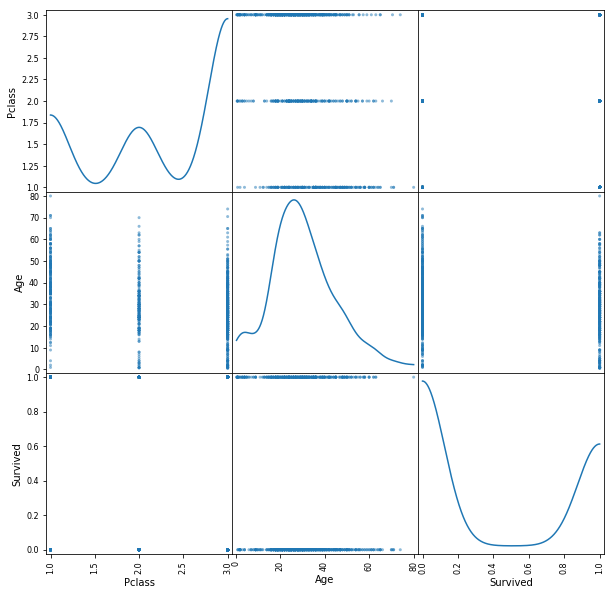

In [229]:
cols=['Pclass','Age','Survived']
pd.plotting.scatter_matrix(titanic[cols], figsize = (10, 10), diagonal = 'kde')

In [246]:

titanic_age1= titanic_age
for dataset in titanic_age:
    titanic_age1['FamilySize'] = titanic_age['SibSp'] + titanic_age['ParCh'] + 1
print (titanic_age1[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303887
1           2  0.544944
2           3  0.579439
3           4  0.687500
4           5  0.187500
5           6  0.125000
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [1]:
titanic_age

NameError: name 'titanic_age' is not defined